# Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
eta

## Stress Intensity Factors
In this section, the far field stresses will be represented in terms of Stress Intensity factors. The schematics assume that we have a far field stress in the horizontal direction represented as $\sigma_x$ with respect to an angled crack represent by angle $\beta$ with respect to this horizontal boundary condition.The stress field in this case will be given as:
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{X} & \eta \sigma_{X} \\
\eta \sigma_{X} & 0
\end{array}
\right]
\end{align}
and the rotated stress field depicted in figure below is shown as:
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right]
\end{align}
However, to transform the global stress field into local with respect to the angle $\beta$ can be done with the help of rotation matrix. Hence,
\begin{align}
R_{\beta} = 
\left[
\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}
\right]
\end{align}
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right] = 
R_{\beta}^T \sigma_{ij} R_{\beta}
\end{align}
In order to convert the local stress field into SIF's to take into account crack length: 
\begin{gather*}
K_I = \sqrt{\pi a} \sigma_{n}\\
K_{II} = \sqrt{\pi a} \sigma_{np}
\end{gather*}
Here, $K_I$ represents the mode I opening failure whereas, $K_{II}$ depicts the sliding failure. The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

<img src="transformationofstressfield.png" width="300"/>

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

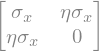

In [4]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

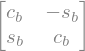

In [5]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

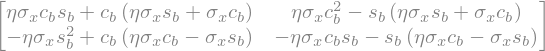

In [6]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

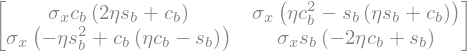

In [7]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [8]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [9]:
#a = sp.simplify(SIF_field)
#l = (Rot.T).inv() * a * Rot.inv()
#l

In [10]:
#sp.simplify(l)

In [11]:
#params1 = {beta:45*np.pi/180}

In [12]:
#K_I_ = K_I#.subs(params)
#K_II_ = K_II#.subs(params)
#K_I_, K_II_

In [13]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [14]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

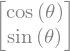

In [15]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress at the Crack tip
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma^{tip}_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}} = 
\left[
\begin{array}{cc}
\sigma_{x} & \sigma_{xy} \\
\sigma_{xy} &  \sigma_{y}
\end{array}
\right]
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

<img src="Transformationfigure.png" width="500"/>

## Angular Function

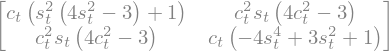

In [16]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

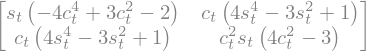

In [17]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

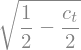

In [18]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

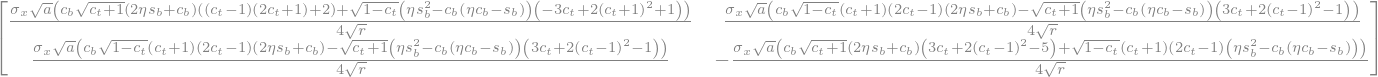

In [19]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h)) / sp.sqrt(2 * sp.pi * r)
sigma_tip_ij_

## Tip Stress Transformation
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
R_{\theta} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma^{tip(\theta)}_{ij} = R_{\theta}^T \sigma^{tip}_{ij} R_{\theta} =
\left[
\begin{array}{cc}
\sigma_{\rho} & \sigma_{\rho \theta} \\
\sigma_{\rho \theta} &  \sigma_{\theta}
\end{array} \right]
\end{align}

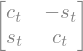

In [20]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_theta

In [21]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_;

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

In [22]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)
sig_tip_theta_ij_sub;

In [23]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim;

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta}$ is maximum depicting principal stress than $\sigma_{\rho \theta}$ becomes:  
\begin{gather*}
\sigma_{\rho \theta} = 0
\end{gather*}

In [24]:
#sig_tip_theta_sim[1,0].subs(params)

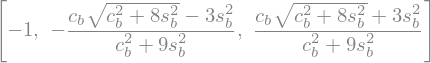

In [25]:
params = {eta : 0}
theta_sigma_xy0 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
theta_sigma_xy0

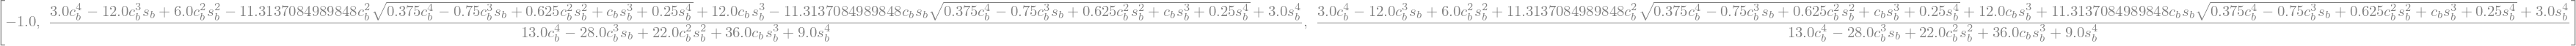

In [26]:
params_ = {sigma_x : 1, eta : 0.5} 
theta_sigma_xy1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
theta_sigma_xy1

In [27]:
#sp.simplify(theta_sigma_xy1[2])

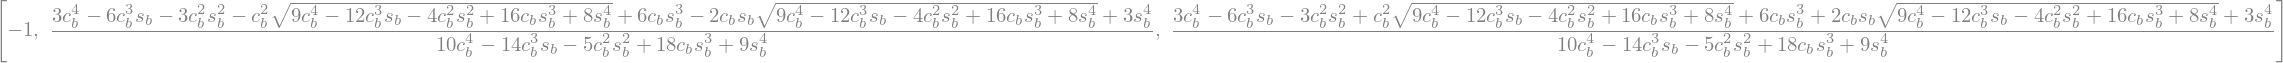

In [28]:
params_2 = {sigma_x : 1, eta : 1}
theta_sigma_xy2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_2), c_t)
theta_sigma_xy2

In [29]:
theta_sig_xy01 = theta_sigma_xy0[1].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy0_1 = sp.acos(theta_sig_xy01)
get_theta_sig_xy01 = sp.lambdify((beta), theta_sig_xy0_1, 'numpy')
get_theta_sig_xy01

<function _lambdifygenerated(Dummy_203)>

In [30]:
theta_sig_xy02 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy0_2 = sp.acos(theta_sig_xy02)
get_theta_sig_xy02 = sp.lambdify((beta), theta_sig_xy0_2, 'numpy')
get_theta_sig_xy02

<function _lambdifygenerated(Dummy_204)>

In [36]:
theta_sig_xy11 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_1 = sp.acos(theta_sig_xy11)
get_theta_sig_xy11 = sp.lambdify((beta), theta_sig_xy1_1, 'numpy')
get_theta_sig_xy11

<function _lambdifygenerated(Dummy_209)>

In [37]:
theta_sig_xy12 = theta_sigma_xy1[1].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_2 = sp.acos(theta_sig_xy12)
get_theta_sig_xy12 = sp.lambdify((beta), theta_sig_xy1_2, 'numpy')
get_theta_sig_xy12

<function _lambdifygenerated(Dummy_210)>

In [38]:
theta_sig_xy21 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_1 = sp.acos(theta_sig_xy21)
get_theta_sig_xy21 = sp.lambdify((beta), theta_sig_xy2_1, 'numpy')
get_theta_sig_xy21

<function _lambdifygenerated(Dummy_211)>

In [39]:
theta_sig_xy22 = theta_sigma_xy2[1].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_2 = sp.acos(theta_sig_xy22)
get_theta_sig_xy22 = sp.lambdify((beta), theta_sig_xy2_2, 'numpy')
get_theta_sig_xy22

<function _lambdifygenerated(Dummy_212)>

<IPython.core.display.Javascript object>


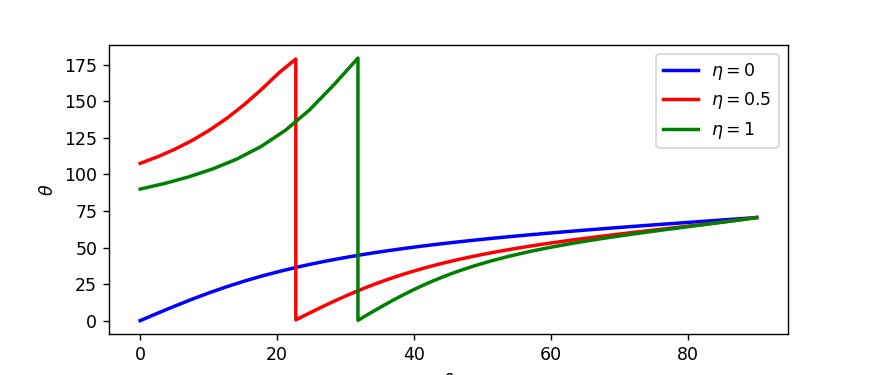

In [45]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0_eta05 = np.linspace(0 * np.pi/180, 22.72 * np.pi/180, 10)
beta_0_eta1 = np.linspace(0 * np.pi/180, 31.79 * np.pi/180, 10)
beta_1_eta05 = np.linspace(22.72* np.pi/180, 90 * np.pi/180, 90)
beta_1_eta1 = np.linspace(31.79 * np.pi/180, 90 * np.pi/180, 90)
beta_eta05 = np.concatenate((beta_0_eta05, beta_1_eta05 ))
beta_eta1 = np.concatenate((beta_0_eta1, beta_1_eta1 ))
theta_sig_xy0 = get_theta_sig_xy02(beta_eta05)
theta_sig_xy1_eta05 = get_theta_sig_xy12(beta_0_eta05)
theta_sig_xy2_eta05 = get_theta_sig_xy11(beta_1_eta05)
theta_sig_xy_12_fin_eta05 = np.concatenate((theta_sig_xy1_eta05, theta_sig_xy2_eta05))
theta_sig_xy1_eta1 = get_theta_sig_xy22(beta_0_eta1)
theta_sig_xy2_eta1 = get_theta_sig_xy21(beta_1_eta1)
theta_sig_xy_12_fin_eta1 = np.concatenate((theta_sig_xy1_eta1, theta_sig_xy2_eta1))
ax1.plot(beta_eta05 * 180/np.pi, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0$')
ax1.plot(beta_eta05 * 180/np.pi, theta_sig_xy_12_fin_eta05 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5$')
ax1.plot(beta_eta1 * 180/np.pi, theta_sig_xy_12_fin_eta1 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("pplotMTSvaryingeta.pdf", bbox_inches='tight')

In [ ]:
beta_

In [52]:
theta_sig_xy1 * 180/ np.pi 

array([40.20781872, 39.17207929, 38.09646946, 36.97887777, 35.81715961,
       34.60915856, 33.35273364, 32.04579372, 30.68633986, 29.27251644,
       27.80267177, 26.2754285 , 24.6897634 , 23.04509557, 21.341381  ,
       19.5792101 , 17.75990341, 15.8855995 , 13.95932739, 11.98505542,
        9.96770806,  7.91314332,  5.82808543,  3.72001078,  1.59698951,
        0.53251052,  2.65984605,  4.7764326 ,  6.87397472,  8.94467679,
       10.98142136, 12.97790596, 14.92873384, 16.82945837, 18.67658519,
       20.46753826, 22.20059824, 23.87482129, 25.48994644, 27.04629821,
       28.54469017, 29.98633313, 31.37275104, 32.7057057 , 33.9871314 ,
       35.21907899, 36.40366929, 37.54305483, 38.63938916, 39.69480261,
       40.71138375, 41.6911655 , 42.63611516, 43.54812764, 44.4290213 ,
       45.2805358 , 46.10433159, 46.9019907 , 47.6750184 , 48.42484563,
       49.15283196, 49.86026885, 50.54838322, 51.21834111, 51.87125146,
       52.50816986, 53.13010235, 53.73800914, 54.33280826, 54.91

In [67]:
theta_sig_xy2 * 180/ np.pi 

array([53.13010235, 51.02785206, 48.73590287, 46.21269812, 43.4088768 ,
       40.26630986, 36.71812754, 32.69106425, 28.11240059, 22.92467203,
       22.92467203, 21.24851504, 19.51630605, 17.72932933, 15.88962648,
       14.00006135, 12.06436372, 10.08714473,  8.07387736,  6.03083756,
        3.96500387,  1.88391747,  0.20449173,  2.29210368,  4.37081916,
        6.43276934,  8.47051042, 10.47719155, 12.44668739, 14.37369028,
       16.25376125, 18.08334221, 19.85973447, 21.58105033, 23.24614484,
       24.85453518, 26.40631361, 27.9020595 , 29.34275422, 30.72970184,
       32.06445732, 33.34876303, 34.58449397, 35.77361132, 36.91812385,
       38.02005641, 39.08142471, 40.10421552, 41.09037156, 42.04178022,
       42.9602656 , 43.84758306, 44.70541604, 45.53537448, 46.33899461,
       47.11773979, 47.87300207, 48.60610441, 49.31830327, 50.01079151,
       50.68470144, 51.34110803, 51.98103209, 52.60544355, 53.21526455,
       53.81137262, 54.39460367, 54.96575491, 55.52558773, 56.07

In [68]:
beta_ * 180/np.pi

array([ 0.        ,  2.52444444,  5.04888889,  7.57333333, 10.09777778,
       12.62222222, 15.14666667, 17.67111111, 20.19555556, 22.72      ,
       22.72      , 23.47595506, 24.23191011, 24.98786517, 25.74382022,
       26.49977528, 27.25573034, 28.01168539, 28.76764045, 29.52359551,
       30.27955056, 31.03550562, 31.79146067, 32.54741573, 33.30337079,
       34.05932584, 34.8152809 , 35.57123596, 36.32719101, 37.08314607,
       37.83910112, 38.59505618, 39.35101124, 40.10696629, 40.86292135,
       41.6188764 , 42.37483146, 43.13078652, 43.88674157, 44.64269663,
       45.39865169, 46.15460674, 46.9105618 , 47.66651685, 48.42247191,
       49.17842697, 49.93438202, 50.69033708, 51.44629213, 52.20224719,
       52.95820225, 53.7141573 , 54.47011236, 55.22606742, 55.98202247,
       56.73797753, 57.49393258, 58.24988764, 59.0058427 , 59.76179775,
       60.51775281, 61.27370787, 62.02966292, 62.78561798, 63.54157303,
       64.29752809, 65.05348315, 65.8094382 , 66.56539326, 67.32

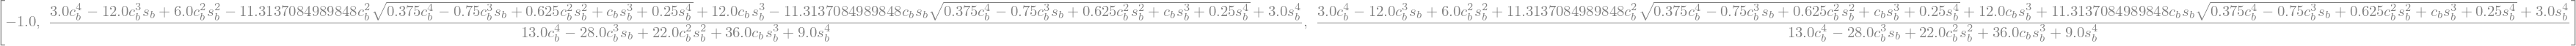

In [36]:
params_x2 = {sigma_x : 2, eta : 0.5}
theta_sigma_x2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x2), c_t)
theta_sigma_x2

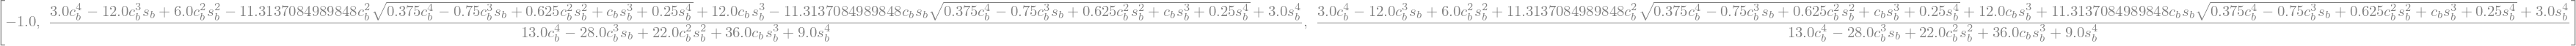

In [37]:
params_x3 = {sigma_x : 3, eta : 0.5}
theta_sigma_x3 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x3), c_t)
theta_sigma_x3

In [38]:
beta = sp.Symbol(r'\beta', nonnegative = True)
theta_sig_x2 = theta_sigma_x2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x2_ = sp.acos(theta_sig_x2)
get_theta_sig_x2 = sp.lambdify((beta), theta_sig_x2_, 'numpy')
get_theta_sig_x2

<function _lambdifygenerated(Dummy_256)>

In [39]:
theta_sig_x3 = theta_sigma_x3[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x3_ = sp.acos(theta_sig_x3)
get_theta_sig_x3 = sp.lambdify((beta), theta_sig_x3_, 'numpy')
get_theta_sig_x3

<function _lambdifygenerated(Dummy_257)>

<IPython.core.display.Javascript object>


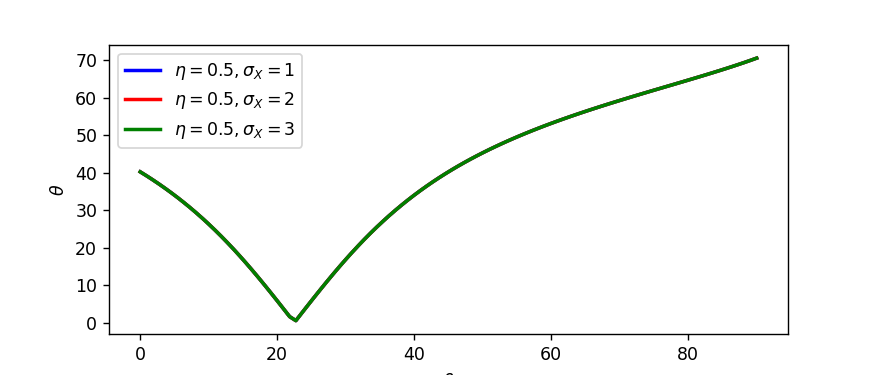

In [40]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_ = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_x1 = get_theta_sig_xy1(beta_)
theta_sig_x2 = get_theta_sig_x2(beta_)
theta_sig_x3 = get_theta_sig_x3(beta_)
ax1.plot(beta_ * 180/np.pi, theta_sig_x1 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x2 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 2$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x3 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 3$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("plotMTSvaryingsigma_x.pdf", bbox_inches='tight')

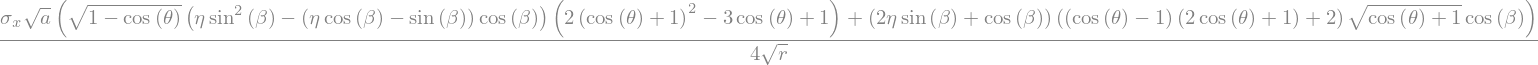

In [60]:
sigma_rr = sigma_tip_ij_[0,0].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta)).subs(c_t, sp.cos(theta))
sigma_rr 

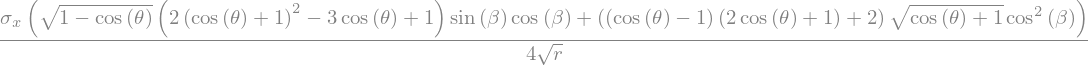

In [76]:
p = {eta:0, a:1}
sigma_rr_p = sigma_rr.subs(p)
sigma_rr_p

In [77]:
get_sigma_rr = sp.lambdify((sigma_x, r, theta, beta), sigma_rr_p, 'numpy')
get_sigma_rr

<function _lambdifygenerated(Dummy_263, r, Dummy_262, Dummy_264)>

<IPython.core.display.Javascript object>


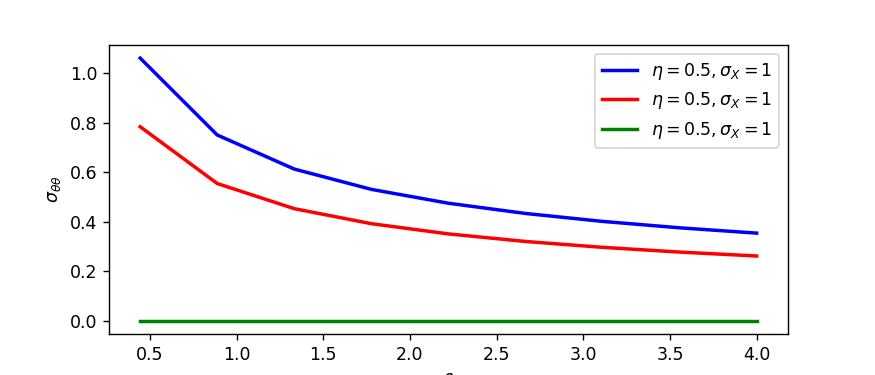

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [79]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
theta_ = (0, 50.83 * np.pi/180, 70.5 * np.pi/180)
r_ = np.linspace(0, 4, 10)
sigma_x_ = 1
sig_rr = get_sigma_rr(sigma_x_,r_, theta_[0], beta_0[0])
sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_[1], beta_0[1])
sig_rr_2 = get_sigma_rr(sigma_x_,r_, theta_[2], beta_0[2])
ax1.plot(r_, sig_rr, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(r_, sig_rr_1, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(r_, sig_rr_2, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\sigma_{\theta \theta}$')
ax1.legend()

<IPython.core.display.Javascript object>


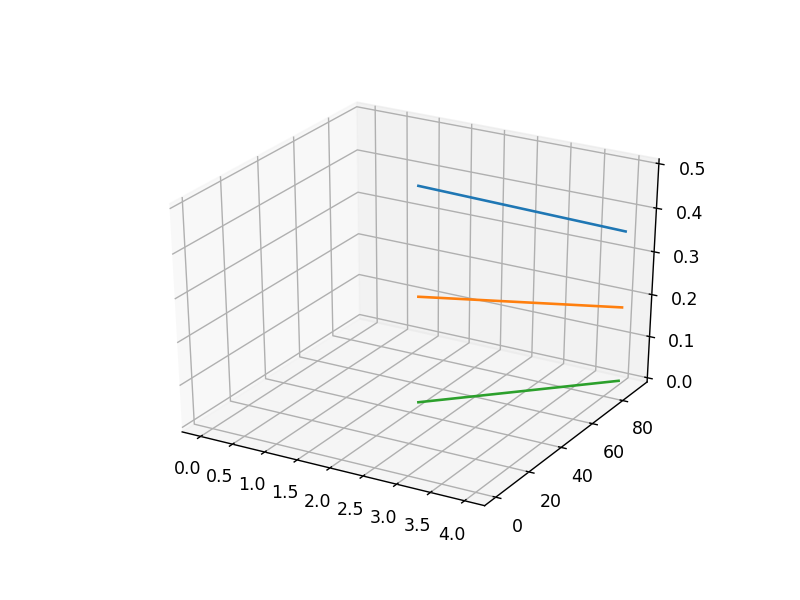

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
theta_ = get_theta_sig_xy0(beta_0[0])
r_ = np.linspace(0, 4, 3)
sig_rr = get_sigma_rr(sigma_x_,r_, theta_, beta_0[0])
sig_rr_ = get_sigma_rr(sigma_x_,r_, theta_, beta_0[1])
sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_, beta_0[2])
ax.plot3D(r_, beta_0*180/np.pi, sig_rr)
ax.plot3D(r_, beta_0*180/np.pi, sig_rr_)
ax.plot3D(r_, beta_0*180/np.pi, sig_rr_1)

## Mixity Parameter

Mode mixity is given as: 
\begin{gather*}
    M_e = \frac{2}{\pi} \arctan \left(\frac{K_I}{K_{II}} \right)
\end{gather*}
where $M_e = 0$ depicts the pure mode II failure and $M_e = 1$ highlights a pure mode I failure.

In [126]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

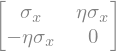

In [127]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x], #eta * sigma_x
                      [-eta * sigma_x, 0]])
sigma_ij

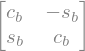

In [128]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

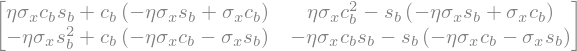

In [129]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

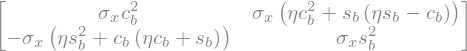

In [130]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [131]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

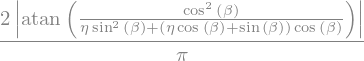

In [132]:
M_e = (2 / sp.pi) * sp.atan(K_I/K_II)
M_e_eta0 = sp.Abs(M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
M_e_eta0

In [133]:
get_M_e = sp.lambdify((eta, beta), M_e_eta0, 'numpy')
get_M_e

<function _lambdifygenerated(Dummy_369, Dummy_370)>

In [134]:
theta_sig_xy0 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin( beta)) #90 * np.pi / 180 - 
theta_sig_xy0_ = sp.acos(theta_sig_xy0)
get_theta_sig_xy0_ = sp.lambdify((beta), theta_sig_xy0_, 'numpy')
get_theta_sig_xy0_

<function _lambdifygenerated(Dummy_371)>

In [135]:
theta_sig_xy1 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_ = sp.acos(theta_sig_xy1)
get_theta_sig_xy1_ = sp.lambdify((beta), theta_sig_xy1_, 'numpy')
get_theta_sig_xy1_

<function _lambdifygenerated(Dummy_372)>

In [136]:
theta_sig_xy2 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_ = sp.acos(theta_sig_xy2)
get_theta_sig_xy2_ = sp.lambdify((beta), theta_sig_xy2_, 'numpy')
get_theta_sig_xy2_

<function _lambdifygenerated(Dummy_373)>

<IPython.core.display.Javascript object>


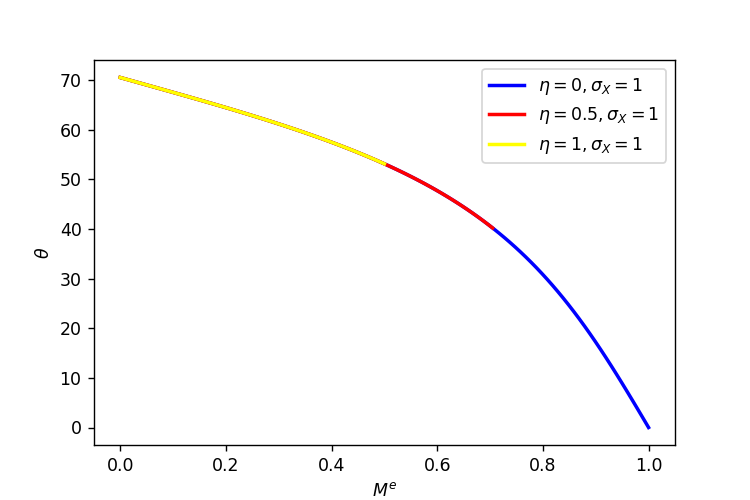

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [193]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_0 = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_xy0 = get_theta_sig_xy0_(beta_0)
theta_sig_xy1 = get_theta_sig_xy1_(beta_0)
theta_sig_xy2 = get_theta_sig_xy2_(beta_0)
M_e_xy0 = get_M_e(eta_0,beta_0)
M_e_xy1 = get_M_e(eta_05, beta_0)
M_e_xy2 = get_M_e(eta_1, beta_0)
ax1.plot(M_e_xy0, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(M_e_xy1, theta_sig_xy1 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(M_e_xy2, theta_sig_xy2 * 180/ np.pi, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("thetaMe.pdf", bbox_inches='tight')

In [145]:
theta_sig_xy1 * 180/ np.pi

array([40.20781872, 40.8777385 , 41.53240899, 42.17219775, 42.79748055,
       43.40863859, 44.00605601, 44.59011781, 45.16120792, 45.71970772,
       46.26599461, 46.80044094, 47.32341302, 47.83527038, 48.3363651 ,
       48.82704133, 49.30763491, 49.77847301, 50.239874  , 50.69214728,
       51.13559317, 51.57050296, 51.99715885, 52.41583407, 52.82679297,
       53.23029108, 53.62657533, 54.01588411, 54.39844752, 54.77448749,
       55.144218  , 55.50784522, 55.86556772, 56.21757669, 56.56405604,
       56.90518267, 57.24112657, 57.57205104, 57.89811284, 58.21946232,
       58.53624359, 58.84859467, 59.15664758, 59.46052846, 59.76035773,
       60.0562501 , 60.34831471, 60.63665519, 60.92136969, 61.20255095,
       61.48028629, 61.75465766, 62.0257416 , 62.29360925, 62.55832626,
       62.81995278, 63.07854334, 63.33414675, 63.586806  , 63.83655806,
       64.08343373, 64.32745742, 64.56864692, 64.80701309, 65.04255956,
       65.2752824 , 65.50516965, 65.73220095, 65.95634697, 66.17

In [146]:
M_e_xy2

array([5.00000000e-01, 4.94910057e-01, 4.89743702e-01, 4.84504519e-01,
       4.79195948e-01, 4.73821296e-01, 4.68383741e-01, 4.62886342e-01,
       4.57332045e-01, 4.51723692e-01, 4.46064024e-01, 4.40355688e-01,
       4.34601246e-01, 4.28803174e-01, 4.22963875e-01, 4.17085678e-01,
       4.11170843e-01, 4.05221569e-01, 3.99239996e-01, 3.93228209e-01,
       3.87188242e-01, 3.81122084e-01, 3.75031677e-01, 3.68918927e-01,
       3.62785700e-01, 3.56633832e-01, 3.50465127e-01, 3.44281361e-01,
       3.38084289e-01, 3.31875641e-01, 3.25657130e-01, 3.19430456e-01,
       3.13197302e-01, 3.06959343e-01, 3.00718246e-01, 2.94475673e-01,
       2.88233285e-01, 2.81992739e-01, 2.75755701e-01, 2.69523838e-01,
       2.63298827e-01, 2.57082355e-01, 2.50876123e-01, 2.44681848e-01,
       2.38501267e-01, 2.32336138e-01, 2.26188244e-01, 2.20059395e-01,
       2.13951432e-01, 2.07866233e-01, 2.01805708e-01, 1.95771812e-01,
       1.89766542e-01, 1.83791943e-01, 1.77850113e-01, 1.71943203e-01,
      

In [147]:
M_e_xy1

array([7.04832765e-01, 6.96739377e-01, 6.88621776e-01, 6.80481341e-01,
       6.72319399e-01, 6.64137225e-01, 6.55936054e-01, 6.47717074e-01,
       6.39481438e-01, 6.31230260e-01, 6.22964625e-01, 6.14685584e-01,
       6.06394161e-01, 5.98091357e-01, 5.89778146e-01, 5.81455484e-01,
       5.73124307e-01, 5.64785533e-01, 5.56440066e-01, 5.48088797e-01,
       5.39732606e-01, 5.31372362e-01, 5.23008927e-01, 5.14643157e-01,
       5.06275904e-01, 4.97908015e-01, 4.89540337e-01, 4.81173719e-01,
       4.72809010e-01, 4.64447064e-01, 4.56088738e-01, 4.47734899e-01,
       4.39386420e-01, 4.31044188e-01, 4.22709098e-01, 4.14382062e-01,
       4.06064008e-01, 3.97755879e-01, 3.89458643e-01, 3.81173285e-01,
       3.72900817e-01, 3.64642277e-01, 3.56398733e-01, 3.48171283e-01,
       3.39961061e-01, 3.31769237e-01, 3.23597023e-01, 3.15445671e-01,
       3.07316485e-01, 2.99210814e-01, 2.91130067e-01, 2.83075709e-01,
       2.75049267e-01, 2.67052339e-01, 2.59086595e-01, 2.51153783e-01,
      

In [148]:
M_e_xy0

array([1.00000000e+00, 9.89898990e-01, 9.79797980e-01, 9.69696970e-01,
       9.59595960e-01, 9.49494949e-01, 9.39393939e-01, 9.29292929e-01,
       9.19191919e-01, 9.09090909e-01, 8.98989899e-01, 8.88888889e-01,
       8.78787879e-01, 8.68686869e-01, 8.58585859e-01, 8.48484848e-01,
       8.38383838e-01, 8.28282828e-01, 8.18181818e-01, 8.08080808e-01,
       7.97979798e-01, 7.87878788e-01, 7.77777778e-01, 7.67676768e-01,
       7.57575758e-01, 7.47474747e-01, 7.37373737e-01, 7.27272727e-01,
       7.17171717e-01, 7.07070707e-01, 6.96969697e-01, 6.86868687e-01,
       6.76767677e-01, 6.66666667e-01, 6.56565657e-01, 6.46464646e-01,
       6.36363636e-01, 6.26262626e-01, 6.16161616e-01, 6.06060606e-01,
       5.95959596e-01, 5.85858586e-01, 5.75757576e-01, 5.65656566e-01,
       5.55555556e-01, 5.45454545e-01, 5.35353535e-01, 5.25252525e-01,
       5.15151515e-01, 5.05050505e-01, 4.94949495e-01, 4.84848485e-01,
       4.74747475e-01, 4.64646465e-01, 4.54545455e-01, 4.44444444e-01,
      

In [149]:
beta_0 * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

## Normalized Parameters

The critical mode I stress intensity factor is given as:
\begin{gather*}
    K_{Ic} = \sigma_X \sqrt{\pi a}
\end{gather*}
Now, the stress intensity factors will be normalized with respect to the $K_{Ic}$ to visualize the failure locus.

In [150]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [151]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

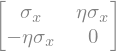

In [153]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ -eta * sigma_x, 0]])
sigma_ij

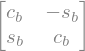

In [154]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

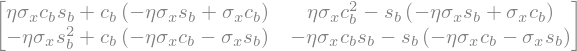

In [155]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

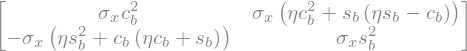

In [156]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [157]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [158]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_I_

In [159]:
get_Norm_K_I = sp.lambdify((eta, beta), Norm_K_I_, 'numpy')
get_Norm_K_I

<function _lambdifygenerated(Dummy_374, Dummy_375)>

In [167]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = sp.Abs(Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
Norm_K_II_

In [168]:
get_Norm_K_II = sp.lambdify((eta, beta), Norm_K_II_, 'numpy')
get_Norm_K_II

<function _lambdifygenerated(Dummy_380, Dummy_381)>

<IPython.core.display.Javascript object>


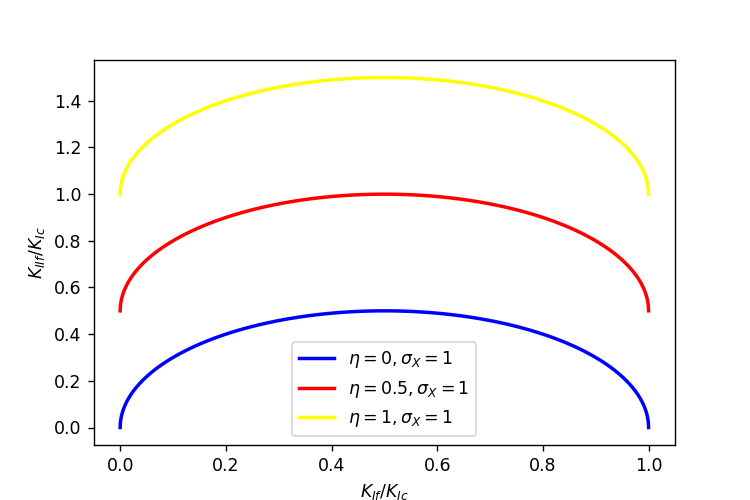

In [169]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(eta_0, beta_)
K_II_K_Ic = get_Norm_K_II(eta_0, beta_)
K_I_K_Ic_ = get_Norm_K_I(eta_05, beta_)
K_II_K_Ic_ = get_Norm_K_II(eta_05, beta_)
K_I_K_Ic_1 = get_Norm_K_I(eta_1, beta_)
K_II_K_Ic_1 = get_Norm_K_II(eta_1, beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_, K_II_K_Ic_, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_1, K_II_K_Ic_1, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()
_.savefig("Failurelocus.pdf", bbox_inches='tight')

## Variation Of SIFs against $\beta$

In [170]:
params = {sigma_x : 1, a : 1}
K_I_ = K_I.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
K_I_

In [171]:
K_II_ = sp.Abs(K_II.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
K_II_

In [172]:
get_K_I = sp.lambdify((eta, beta), K_I_, 'numpy')
get_K_I

<function _lambdifygenerated(Dummy_382, Dummy_383)>

In [173]:
get_K_II = sp.lambdify((eta, beta), K_II_, 'numpy')
get_K_II

<function _lambdifygenerated(Dummy_384, Dummy_385)>

<IPython.core.display.Javascript object>


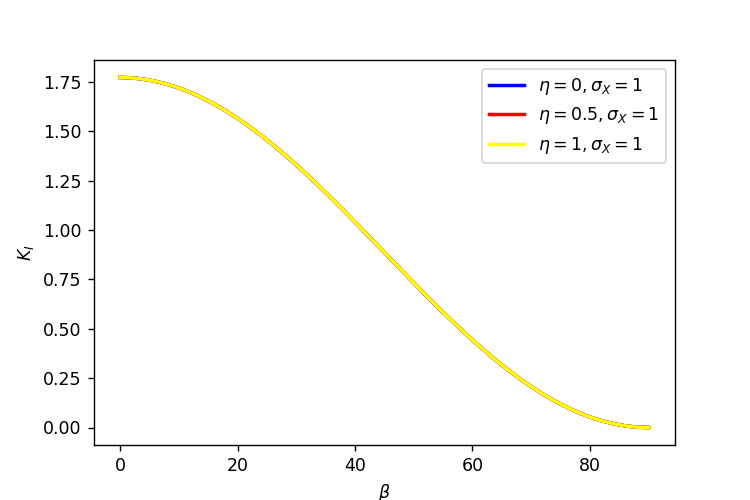

In [174]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_1 = get_K_I(eta_0, beta_)
K_I_2 = get_K_I(eta_05, beta_)
K_I_3 = get_K_I(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_I_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{I}$')
ax1.legend()
_.savefig("KIbeta.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


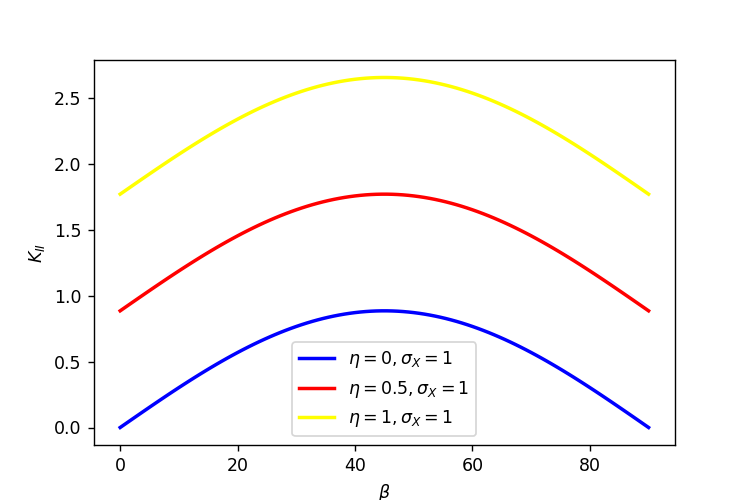

In [175]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_II_1 = get_K_II(eta_0, beta_)
K_II_2 = get_K_II(eta_05, beta_)
K_II_3 = get_K_II(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_II_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{II}$')
ax1.legend()
_.savefig("KIIbeta.pdf", bbox_inches='tight')

In [176]:
K_II_2

array([0.88622693, 0.91434507, 0.94243491, 0.97046815, 0.99841657,
       1.02625202, 1.05394647, 1.08147205, 1.10880103, 1.1359059 ,
       1.16275937, 1.18933439, 1.2156042 , 1.24154236, 1.26712275,
       1.29231961, 1.31710756, 1.34146166, 1.36535737, 1.38877065,
       1.4116779 , 1.43405606, 1.45588261, 1.47713557, 1.49779353,
       1.51783569, 1.53724188, 1.55599255, 1.57406882, 1.59145249,
       1.60812607, 1.62407275, 1.63927648, 1.65372196, 1.66739463,
       1.68028073, 1.69236729, 1.70364214, 1.71409391, 1.7237121 ,
       1.732487  , 1.7404098 , 1.7474725 , 1.75366801, 1.75899007,
       1.76343334, 1.76699333, 1.76966647, 1.77145006, 1.7723423 ,
       1.7723423 , 1.77145006, 1.76966647, 1.76699333, 1.76343334,
       1.75899007, 1.75366801, 1.7474725 , 1.7404098 , 1.732487  ,
       1.7237121 , 1.71409391, 1.70364214, 1.69236729, 1.68028073,
       1.66739463, 1.65372196, 1.63927648, 1.62407275, 1.60812607,
       1.59145249, 1.57406882, 1.55599255, 1.53724188, 1.51783

In [177]:
beta_ * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 28900, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          a_0: 16, #mm
          f_1: 1.123,
          COD : 0.0094, ##mm
          K_Ic : 26.3 #N/mm2
         }

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
G = (sigma_x_ * pi * a * f_1**2)/E
G

In [ ]:
G_ = G.subs(params)
G_

In [ ]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha = (pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = sp.simplify(alpha.subs(params))
alpha_

In [ ]:
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_1_ = d_1.subs(params)
d_2_ = d_2.subs(params)
d_2_, d_1_

In [ ]:
#get_d_1 = sp.lambdify((a), d_1_, 'numpy')
#get_d_1

In [ ]:
#get_d_2 = sp.lambdify((a), d_2_, 'numpy')
#get_d_2

In [ ]:
beta_2 = (K_Ic**2 * (alpha_ * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))/(d_1 - ((alpha_-1)/alpha_))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
#get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
#get_beta_2

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
#sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(16, 100, 100)
a_g = np.linspace(0, 100, 100)
R = get_R(a) 
#R_I_c = R_Ic_
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2, label= 'R-curve')
ax1.plot(a_g , G, color='blue', lw=2, label= 'G')
#ax1.plot(a , R_I_c, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [ ]:
R

In [ ]:
G